In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_excel("data/default of credit card clients.xls", skiprows=1)

In [4]:
df.head(15)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [5]:
df.columns = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
              'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
              'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT']

In [7]:
def feature_engineering(df):
    """Create new features from raw data"""
    
    df['CUR'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1) / df['LIMIT_BAL']
    
    df['PDT'] = (df['PAY_0'] * 3 + df['PAY_2'] * 2.5 + df['PAY_3'] * 2 + df['PAY_4'] * 1.5 + df['PAY_5'] * 1 + df['PAY_6'] * 0.5)
    
    df['TOA'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)
    
#     df['PRS'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1) / df['TOA']
    
    df['RPB'] = (df['PAY_0'] + df['PAY_2']) / 2    
    df.fillna(0, inplace=True)   # fill NaN values
    return df[['CUR', 'PDT', 'TOA', 'RPB']]


In [8]:
# Feature Engineering
data = feature_engineering(df)
data = data.astype(float)

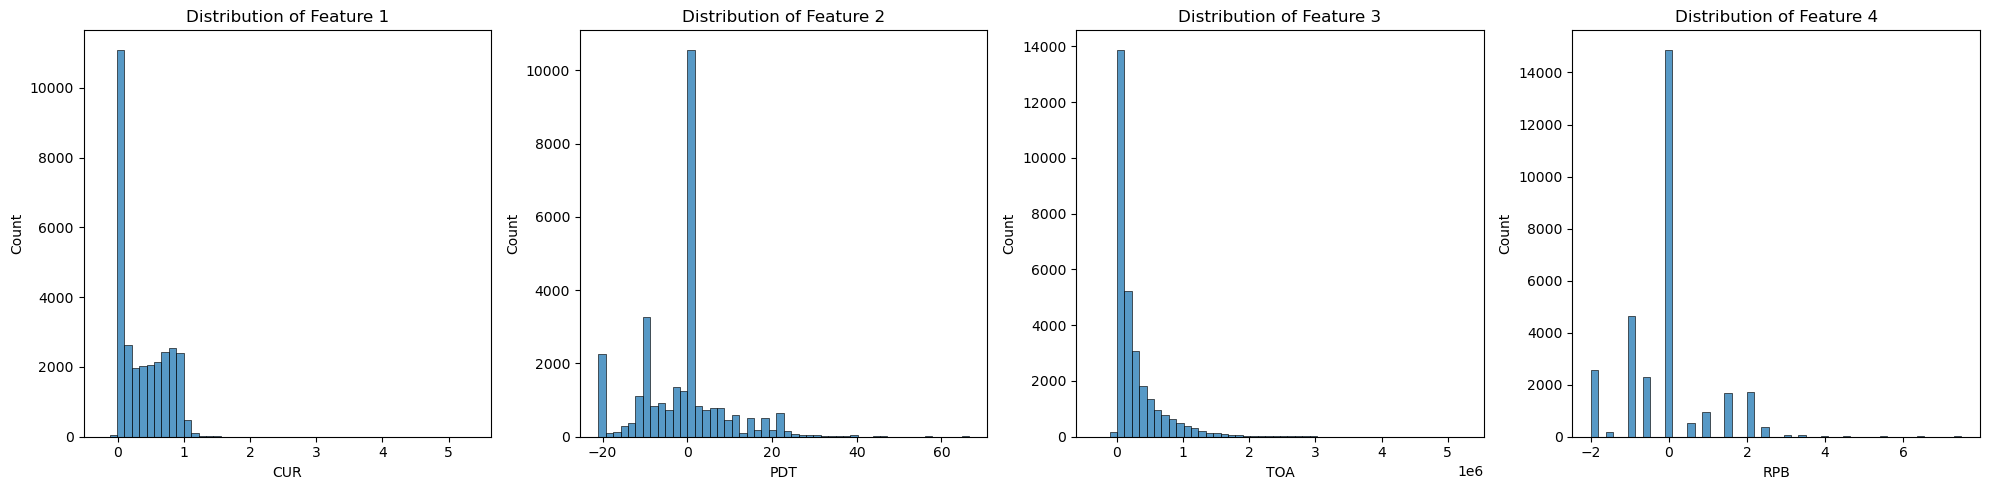

In [14]:
fig, axes = plt.subplots(1, data.shape[1], figsize=(20, 5))  

# Loop through each column and plot distribution
for idx in range(data.shape[1]):
    sns.histplot(data.iloc[:, idx], ax=axes[idx], bins=50)  # Use .iloc for column selection
    axes[idx].set_title(f"Distribution of Feature {idx + 1}")  

plt.tight_layout()
plt.show()

In [16]:
data.to_csv("data/engineered_features.csv", index=False)


In [18]:
data.describe()

,CUR,PDT,TOA,RPB
count,30000.000000,30000.000000,3.000000e+04,30000.000000
mean,0.373048,-1.459667,2.698617e+05,-0.075233
std,0.351890,10.372223,3.795643e+05,1.061231
min,-0.232590,-21.000000,-3.362590e+05,-2.000000
25%,0.029997,-8.500000,2.868800e+04,-0.500000
50%,0.284834,0.000000,1.263110e+05,0.000000
75%,0.687929,0.000000,3.426265e+05,0.000000
max,5.364308,66.500000,5.263883e+06,7.500000


In [20]:
data_dbiecm = data.iloc[:300]
data_dbiecm.to_csv("data/dbiecm_dataset.csv", index=False)